## Project Title: Restaurant Rating Predictor

## Student(s): Abdullah Shah, Ayesha Mubashir, Giang Do

#### Date: June 05, 2022
---

# Import modules:

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import GridSearchCV # used for hypertuning the parameters
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

<hr style="border:2px solid black">

# Data loading:

In [6]:
df= pd.read_csv('fileDataFrame.csv')

In [7]:
#Check columns' datatype
df.dtypes

Unnamed: 0                      int64
business_id                    object
name                           object
address                        object
city                           object
state                          object
stars                         float64
RestaurantsDelivery            object
OutdoorSeating                 object
BusinessAcceptsCreditCards     object
BikeParking                    object
RestaurantsPriceRange2         object
RestaurantsTakeOut             object
ByAppointmentOnly              object
WiFi                           object
Alcohol                        object
Caters                         object
RestaurantsAttire              object
GoodForKids                    object
DogsAllowed                    object
RestaurantsTableService        object
WheelchairAccessible           object
DriveThru                      object
Smoking                        object
Open24Hours                    object
dtype: object

In [8]:
df.count()

Unnamed: 0                    44594
business_id                   44594
name                          44594
address                       44031
city                          44594
state                         44594
stars                         44594
RestaurantsDelivery           44594
OutdoorSeating                44594
BusinessAcceptsCreditCards    44594
BikeParking                   44594
RestaurantsPriceRange2        44594
RestaurantsTakeOut            44594
ByAppointmentOnly             44594
WiFi                          44594
Alcohol                       44594
Caters                        44594
RestaurantsAttire             44594
GoodForKids                   44594
DogsAllowed                   44594
RestaurantsTableService       44594
WheelchairAccessible          44594
DriveThru                     44594
Smoking                       44594
Open24Hours                   44594
dtype: int64

In [9]:
df.head(5)

,Unnamed: 0,business_id,name,address,city,state,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,...,Alcohol,Caters,RestaurantsAttire,GoodForKids,DogsAllowed,RestaurantsTableService,WheelchairAccessible,DriveThru,Smoking,Open24Hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,False,False,False,...,no,True,U,U,U,U,U,U,U,U
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,2.0,True,True,True,...,no,False,'casual',True,False,False,True,True,U,U
2,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,1.5,True,True,True,...,no,False,'casual',True,False,False,True,True,U,U
3,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,4.0,U,False,U,...,U,U,U,U,U,U,U,U,U,U
4,12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,2.5,True,False,True,...,U,U,'casual',True,U,U,U,U,U,U


In [10]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'stars', 'RestaurantsDelivery', 'OutdoorSeating',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsTakeOut', 'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters',
       'RestaurantsAttire', 'GoodForKids', 'DogsAllowed',
       'RestaurantsTableService', 'WheelchairAccessible', 'DriveThru',
       'Smoking', 'Open24Hours'],
      dtype='object')

<hr style="border:2px solid black">

# Converting "stars" column (Label Column) to binary:
- ### 1: Represents stars ranging from 4 and up.
- ### 0: Represents stars ranging from 3.5 and below.

In [11]:
# if a restaurant has greater than and equal to 4 stars assign it a value of 1, otherwise 0
for i in range(0,len(df)):
    if df['stars'][i] >= 4:
        df.loc[i,'stars'] = 1
    else: 
        df.loc[i,'stars']=0

print("Number of restaurats classified as greater than or equal to 4 stars (1):  ",
      len(df[(df['stars'] == 1)]))

print("Number of restaurats classified as less than or equal to 3.5 stars (0):  ",
      len(df[(df['stars'] == 0)]))

Number of restaurats classified as greater than or equal to 4 stars (1):   21449
Number of restaurats classified as less than or equal to 3.5 stars (0):   23145


In [12]:
# dataframe with new "stars" column edit
df.head(3)

,Unnamed: 0,business_id,name,address,city,state,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,...,Alcohol,Caters,RestaurantsAttire,GoodForKids,DogsAllowed,RestaurantsTableService,WheelchairAccessible,DriveThru,Smoking,Open24Hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,1.0,False,False,False,...,no,True,U,U,U,U,U,U,U,U
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,0.0,True,True,True,...,no,False,'casual',True,False,False,True,True,U,U
2,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,0.0,True,True,True,...,no,False,'casual',True,False,False,True,True,U,U


<hr style="border:2px solid black">

# Create feature matrix (x) and target vector (y):

In [13]:
# create feature matrix (x) and target vector (y)
# separating the dependent and independent variables
x = df.drop(['Unnamed: 0','stars', 'business_id', 'name', 'address'], 1)
y = df['stars']

<ipython-input-13-c73b07eb0aa7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['Unnamed: 0','stars', 'business_id', 'name', 'address'], 1)


<hr style="border:2px solid black">

# Encode labels:

In [14]:
# Intantiate LabelEncoder
le = preprocessing.LabelEncoder()

In [15]:
# applying label encoder to x set which contains categorical values...
x = x.apply(le.fit_transform)

In [16]:
x.head(3)

,city,state,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsAttire,GoodForKids,DogsAllowed,RestaurantsTableService,WheelchairAccessible,DriveThru,Smoking,Open24Hours
0,574,13,0,0,0,1,0,1,0,2,1,1,3,2,2,2,2,2,2,2
1,16,14,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,1,2,2
2,502,14,1,1,1,2,0,1,0,1,1,0,0,1,0,0,1,1,2,2


In [17]:
x.shape

(44594, 20)

In [18]:
y.shape

(44594,)

<hr style="border:2px solid black">

# Splitting dataset to train and test:

In [19]:
# splitting data to training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [20]:
# scale the training 
# to equalize the range and/or data variability.
scaler = StandardScaler()
resTrain_Scaled = scaler.fit_transform(x_train)

In [21]:
#scale the test data
resTest_scaled = scaler.transform(x_test)

<hr style="border:2px solid black">

# Logistic Regression:

In [23]:
#Logistic Regression Classifier Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Model with Hyperparameter Tuning

In [22]:
# Hyperparameter Tuning
param_grid = [    
    {'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [24]:
# create instance of Logistic Regression model
#Prepairng a Decision Tree Regression
logitModel=LogisticRegression()

In [25]:
logitModel = GridSearchCV(logitModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, error_score='raise')

In [26]:
# fit
logitModel.fit(resTrain_Scaled,y_train)
#logitModel.fit(resTrain_Scaled,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 1000, 2500, 5000],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [27]:
print(logitModel.best_params_)

{'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}


In [28]:
#Predict the response for test dataset
y_pred_Logistic = logitModel.predict(resTest_scaled)

In [29]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('Logistic Regression Classification Accuracy: ',accuracy_score(y_pred_Logistic,y_test))

# Summary of the predictions made by the classifier
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_Logistic))
print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test, y_pred_Logistic))

Logistic Regression Classification Accuracy:  0.650633479089584
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.70      0.67      4565
         1.0       0.66      0.60      0.63      4354

    accuracy                           0.65      8919
   macro avg       0.65      0.65      0.65      8919
weighted avg       0.65      0.65      0.65      8919

Logistic Regression Confusion Matrix:
 [[3205 1360]
 [1756 2598]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


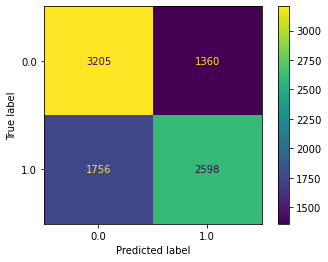

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logitModel, resTest_scaled, y_test)  
plt.show()

# AUC ROC Score:

In [31]:
from sklearn.metrics import roc_auc_score
# displays Area Under the Curve (AUC) Values
print("AUC Score:")
print(roc_auc_score(y_test, logitModel.predict_proba(resTest_scaled)[::, 1]))


AUC Score:
0.6994278278185612


# ROC Curve

0.6994278278185612


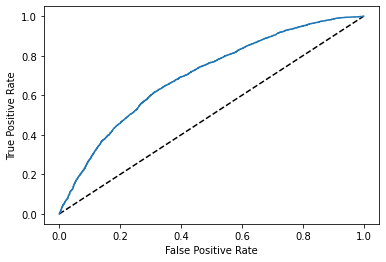

In [32]:
from sklearn.metrics import roc_curve
#define metrics
y_pred_proba = logitModel.predict_proba(resTest_scaled)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
print(metrics.auc(fpr, tpr))

#create ROC curve
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


In [33]:
y_testDict = dict(list(enumerate(y_test.index)))

In [1]:
#print(y_testDict)

In [35]:
print(y_testDict[409])

8915


In [36]:
print(df.iloc[8915]["name"])

Tableau


In [37]:
# create prediction off of trained model by using test set

In [38]:
# compare predicted results with test set label

In [39]:
y_test.iloc[409]

1.0

In [40]:
logitModel.predict(resTest_scaled[[409]])
#logisticRegr.predict(x_test[0].reshape(1,-1))

array([1.])

<hr style="border:2px solid black">

# Decision Tree Classifier:

In [61]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Model with Hyperparameter Tuning

In [41]:
# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': list(range(2, 100))
}

In [42]:
#MODELLING

#Decision Tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [43]:
clf = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, error_score='raise')

In [44]:
# Train Decision Tree Classifer
clf.fit(resTrain_Scaled,y_train)

Fitting 5 folds for each of 3528 candidates, totalling 17640 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=True)

In [45]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 87, 'min_samples_split': 2}


In [46]:
#Predict the response for test dataset
y_pred_DT = clf.predict(resTest_scaled)

In [47]:
#Decision Tree Classifier Evaluation


# Accuracy score
from sklearn.metrics import accuracy_score
print('Decision Tree Classification Accuracy: ',accuracy_score(y_pred_DT,y_test))

# Summary of the predictions made by the classifier
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_DT))
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred_DT))

Decision Tree Classification Accuracy:  0.6766453638300258
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.68      0.68      4565
         1.0       0.67      0.68      0.67      4354

    accuracy                           0.68      8919
   macro avg       0.68      0.68      0.68      8919
weighted avg       0.68      0.68      0.68      8919

Decision Tree Confusion Matrix:
 [[3082 1483]
 [1401 2953]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


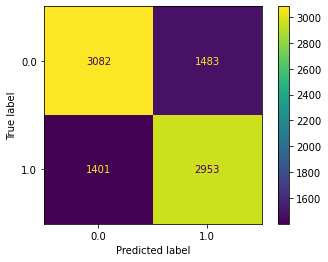

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, resTest_scaled, y_test)  
plt.show()

# AUC ROC Score:

In [49]:
# might remove

from sklearn.metrics import roc_auc_score
print("AUC Score:")
print(roc_auc_score(y_test, clf.predict_proba(resTest_scaled)[:,1]))


AUC Score:
0.7432804672567583


# ROC Curve:

0.7432804672567583


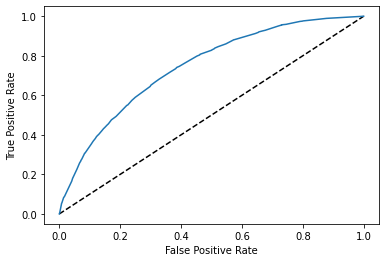

In [50]:
from sklearn.metrics import roc_curve
#define metrics
y_pred_DT = clf.predict_proba(resTest_scaled)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_DT)
print(metrics.auc(fpr, tpr))
#create ROC curve
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();



<hr style="border:2px solid black">

# Random Forest Classifier:

In [62]:
from sklearn.ensemble import RandomForestClassifier  #Import Random Forest Model
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Model with Hyperparameter Tuning

In [51]:
random_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [52]:
## Random Forest

#Create Random Forest classifer object

clf_RF =RandomForestClassifier()

In [53]:
clf_RF = RandomizedSearchCV(clf_RF, param_distributions = random_grid, n_iter = 100, cv = 5, random_state=35, verbose=True, n_jobs=-1)

In [54]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(resTrain_Scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   random_state=35, verbose=True)

In [55]:
print(clf_RF.best_params_)

{'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 80, 'bootstrap': True}


In [56]:
#Predict the response for test dataset
y_pred_RF = clf_RF.predict(resTest_scaled)

In [57]:
##Random Forest Classification Evaluation


# Accuracy score
from sklearn.metrics import accuracy_score
print('Random Forest Classification Accuracy: ',accuracy_score(y_pred_RF,y_test))

# Summary of the predictions made by the classifier
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_RF))
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_RF))

Random Forest Classification Accuracy:  0.6930149119856486
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      4565
         1.0       0.68      0.69      0.69      4354

    accuracy                           0.69      8919
   macro avg       0.69      0.69      0.69      8919
weighted avg       0.69      0.69      0.69      8919

Random Forest Confusion Matrix:
 [[3178 1387]
 [1351 3003]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


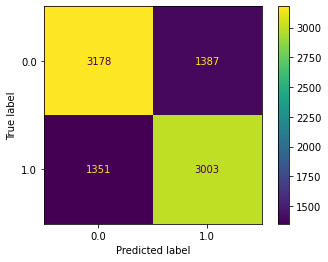

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_RF, resTest_scaled, y_test)  
plt.show()

# AUC ROC Score:

In [59]:
# might remove

from sklearn.metrics import roc_auc_score
print("AUC Score:")
print(roc_auc_score(y_test, clf_RF.predict_proba(resTest_scaled)[:,1]))


AUC Score:
0.7644460583386705


# ROC Curve:

0.7644460583386705


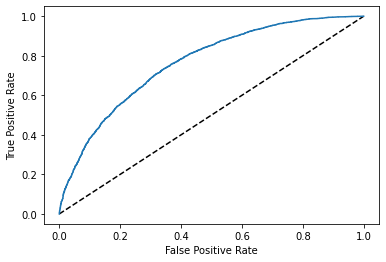

In [60]:
from sklearn.metrics import roc_curve
#define metrics
y_pred_RF = clf_RF.predict_proba(resTest_scaled)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_RF)
print(metrics.auc(fpr, tpr))
#create ROC curve
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();
